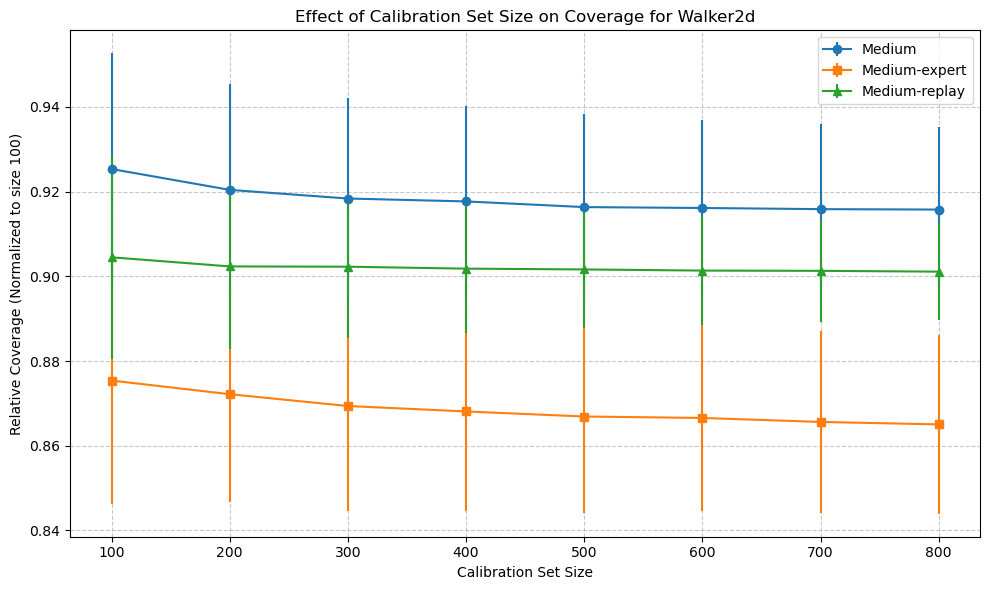

In [13]:
import matplotlib.pyplot as plt
import numpy as np

calibration_set_sizes = np.array([100, 200, 300, 400, 500, 600, 700, 800])

# Interval widths for each dataset
dataset1_widths = np.array([0.9253499999999998, 0.9204249999999999, 0.9183833333333333, 0.9177, 0.9163600000000001, 0.9161500000000001, 0.9158785714285714, 0.915775])
dataset2_widths = np.array([0.8754000000000001, 0.872175, 0.8693833333333333, 0.8681, 0.8669100000000001, 0.8665666666666667, 0.8656285714285713, 0.8650437500000001])
dataset3_widths = np.array([0.9045000000000001, 0.90235, 0.9022833333333333, 0.9018250000000001, 0.9016400000000001, 0.9013666666666668, 0.9013071428571428, 0.90111875])

# Standard deviation for each dataset
dataset1_std = np.array([0.02731533452110736, 0.025038857302201303, 0.0237620787998207, 0.02247965747070003, 0.021878080354546643, 0.020810914604280768, 0.02011519250188163, 0.01944284894247754])
dataset2_std = np.array([0.029040316802679697, 0.025424287108983035, 0.024779757643869114, 0.023614402384985328, 0.022807935022706474, 0.02207099655405006, 0.021445060322715315, 0.021086828494050514])
dataset3_std = np.array([0.02403643068344384, 0.01938369159886734, 0.01686326546734714, 0.015092858410519865, 0.013856781733144252, 0.012853620328746129, 0.012099525627402234, 0.011430426432880803])

# Normalize data using the value at calibration set size 100
dataset1_widths_normalized = dataset1_widths / dataset1_widths[0]
dataset2_widths_normalized = dataset2_widths / dataset2_widths[0]
dataset3_widths_normalized = dataset3_widths / dataset3_widths[0]

# Normalize standard deviations
dataset1_std_normalized = dataset1_std / dataset1_widths[0]
dataset2_std_normalized = dataset2_std / dataset2_widths[0]
dataset3_std_normalized = dataset3_std / dataset3_widths[0]
        
plt.figure(figsize=(10, 6))

plt.errorbar(calibration_set_sizes, dataset1_widths, yerr=dataset1_std, fmt='o-', label='Medium')
plt.errorbar(calibration_set_sizes, dataset2_widths, yerr=dataset2_std, fmt='s-', label='Medium-expert')
plt.errorbar(calibration_set_sizes, dataset3_widths, yerr=dataset3_std, fmt='^-', label='Medium-replay')

plt.xlabel('Calibration Set Size')
plt.ylabel('Relative Coverage (Normalized to size 100)')
plt.title('Effect of Calibration Set Size on Coverage for Walker2d')
#plt.ylim(0.9, 1.1)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.savefig("plots/coverage_with_calib_size_walker2d.png")
plt.show()

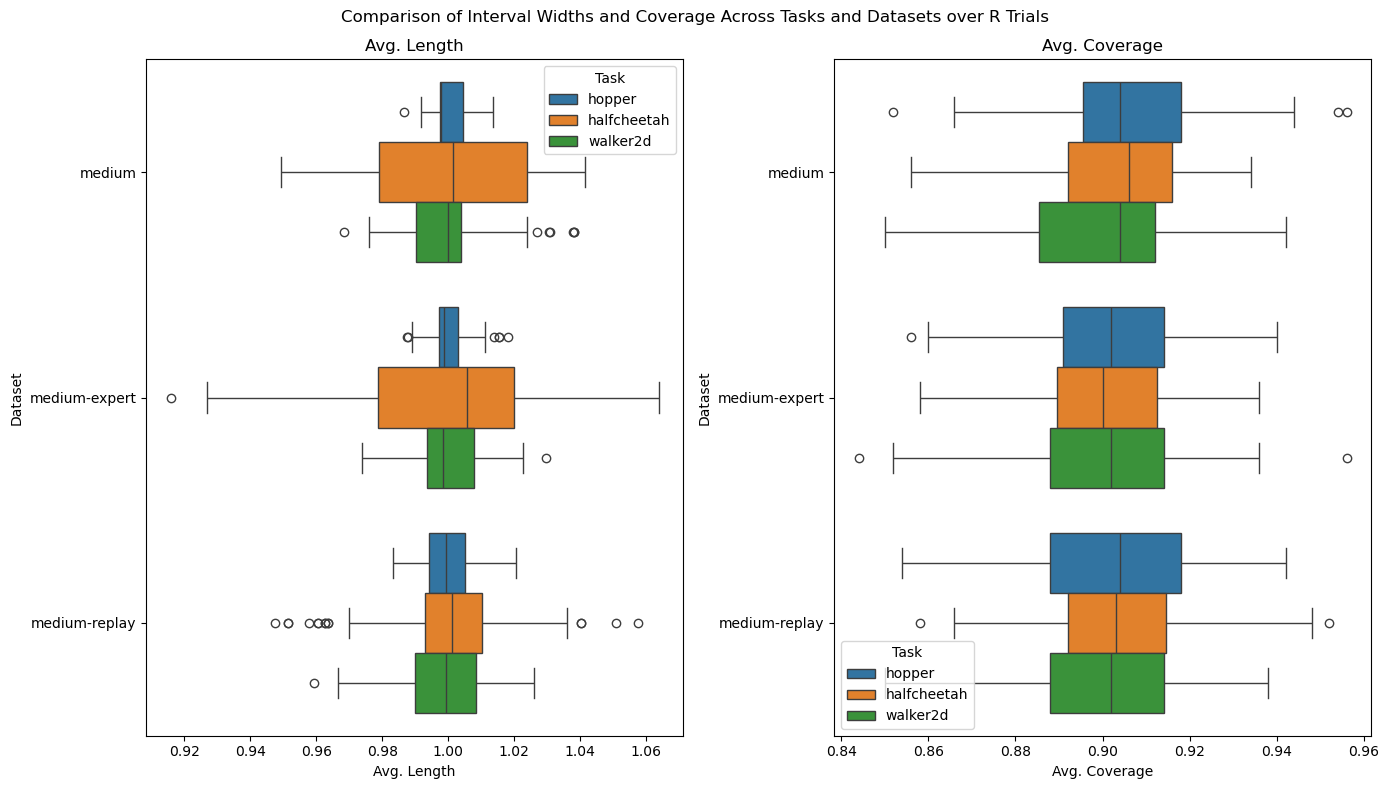

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import pickle

# Sample data for three tasks and three datasets
tasks = ['hopper', 'halfcheetah', 'walker2d']
datasets = ['medium', 'medium-expert', 'medium-replay']

# Generate some random data for illustration purposes
np.random.seed(0)
data = []
for task in tasks:
    for dataset in datasets:
        dataset_name = task + '-' + dataset + '-' 'v2'
        file = open("data/coverage_rtrials_" + dataset_name,'rb')
        coverage = pickle.load(file)
        file.close()
        file = open("data/lengths_rtrials_" + dataset_name,'rb')
        lengths = pickle.load(file)
        file.close()
        mean_length = np.mean(lengths)  # Calculate the mean of lengths
        normalized_lengths = lengths / mean_length  # Normalize lengths
        for length, cover in zip(normalized_lengths, coverage):
            data.append([task, dataset, length, cover])

# Convert data to a DataFrame
df = pd.DataFrame(data, columns=['Task', 'Dataset', 'Avg. Length', 'Avg. Coverage'])

# Plot the data
fig, axes = plt.subplots(1, 2, figsize=(14, 8))

# Plot Average Length
sns.boxplot(x='Avg. Length', y='Dataset', hue='Task', data=df, ax=axes[0])
axes[0].set_title('Avg. Length')

# Plot Average Coverage
sns.boxplot(x='Avg. Coverage', y='Dataset', hue='Task', data=df, ax=axes[1])
axes[1].set_title('Avg. Coverage')
#axes[1].set_xlim(0.8, 1.0)

plt.suptitle('Comparison of Interval Widths and Coverage Across Tasks and Datasets over R Trials')
plt.tight_layout()
plt.show()


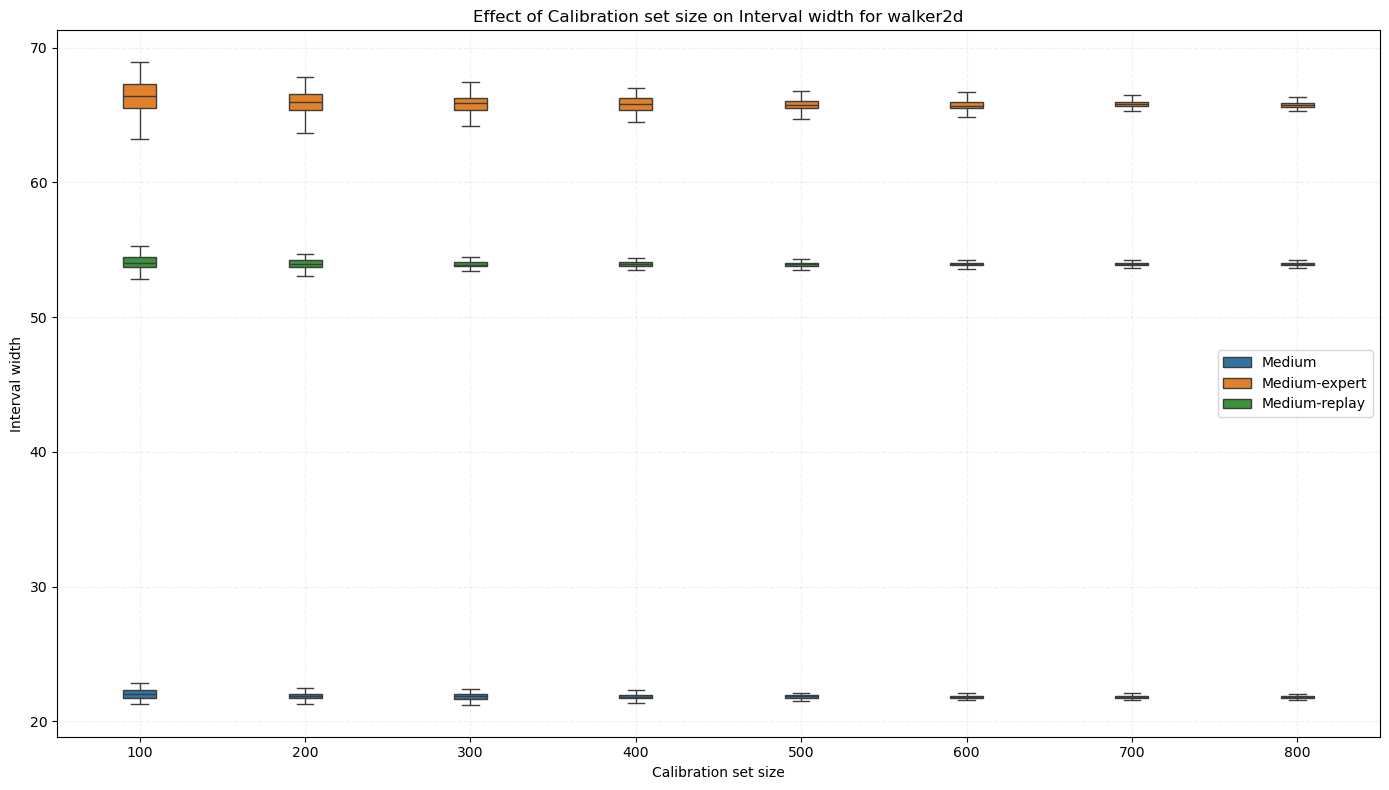

In [127]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import pickle
# Sample data for three datasets (replace with your actual data)
calibration_set_sizes = np.array([100, 200, 300, 400, 500, 600, 700, 800])

task = "hopper"
file = open("data/calib_size_over_R_CQR_"+ task + "-medium-v2",'rb')
medium = pickle.load(file)
file.close()
file = open("data/calib_size_over_R_CQR_"+ task + "-medium-expert-v2",'rb')
medium_expert = pickle.load(file)
file.close()
file = open("data/calib_size_over_R_CQR_"+ task + "-medium-replay-v2",'rb')
medium_replay = pickle.load(file)
file.close()

data = []

for i, size in enumerate(calibration_set_sizes):
    data.extend([['Medium', size, medium[size][1][j]] for j in range(100)])
    data.extend([['Medium-expert', size, medium_expert[size][1][j]] for j in range(100)])
    data.extend([['Medium-replay', size, medium_replay[size][1][j]] for j in range(100)])

df = pd.DataFrame(data, columns=['Dataset', 'Calibration set size', 'Interval width'])
#print(df[:50])
plt.figure(figsize=(7, 4))
sns.boxplot(x='Calibration set size', y='Interval width', hue='Dataset', data=df, showfliers=False, dodge=False, width=0.2)

plt.xlabel('Calibration set size')
plt.ylabel('Interval width')
plt.title('Effect of Calibration set size on Interval width for ' + task)
#plt.ylim(0.8, 1.0)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.2)
plt.tight_layout()
plt.savefig("plots/cqr_width_with_calib_size_" + task + "_boxplot.pdf", format='pdf')
plt.show()
